# A collection of different sorting algorithms

## Important imports and helper functions

In [16]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np

# Helper function to generate random lists
def generate_random_list(size, min_val=1, max_val=100):
    """Generate a random list of integers."""
    return [random.randint(min_val, max_val) for _ in range(size)]

# Helper function to check if a list is sorted
def is_sorted(lst):
    """Check if a list is sorted in ascending order."""
    return all(lst[i] <= lst[i+1] for i in range(len(lst)-1))

# Helper function to time a sorting function
def time_sort(sort_func, lst):
    """Time how long a sorting function takes."""
    lst_copy = lst.copy()
    start = time.time()
    sort_func(lst_copy)
    end = time.time()
    return end - start

## Bubble Sort

In [17]:
def bubble_sort_demo(lst):
    """Bubble sort with step-by-step visualization."""
    n = len(lst) #total number of items in the list
    lst = lst.copy() #copy of the input list
    print(f"Starting list: {lst}")  #ensures we make enough passes through the list to sort completely

    for i in range(n):
        swapped = False
        for j in range(0, n-i-1):
            if lst[j] > lst[j+1]:
                lst[j], lst[j+1] = lst[j+1], lst[j]
                swapped = True
                print(f"Swapped {lst[j+1]} and {lst[j]}: {lst}")

        if not swapped:
            break

    print(f"Final sorted list: {lst}")
    return lst

In [18]:
# Demo
demo_list = [64, 34, 25, 12, 22, 11, 90]
bubble_sort_demo(demo_list)

Starting list: [64, 34, 25, 12, 22, 11, 90]
Swapped 64 and 34: [34, 64, 25, 12, 22, 11, 90]
Swapped 64 and 25: [34, 25, 64, 12, 22, 11, 90]
Swapped 64 and 12: [34, 25, 12, 64, 22, 11, 90]
Swapped 64 and 22: [34, 25, 12, 22, 64, 11, 90]
Swapped 64 and 11: [34, 25, 12, 22, 11, 64, 90]
Swapped 34 and 25: [25, 34, 12, 22, 11, 64, 90]
Swapped 34 and 12: [25, 12, 34, 22, 11, 64, 90]
Swapped 34 and 22: [25, 12, 22, 34, 11, 64, 90]
Swapped 34 and 11: [25, 12, 22, 11, 34, 64, 90]
Swapped 25 and 12: [12, 25, 22, 11, 34, 64, 90]
Swapped 25 and 22: [12, 22, 25, 11, 34, 64, 90]
Swapped 25 and 11: [12, 22, 11, 25, 34, 64, 90]
Swapped 22 and 11: [12, 11, 22, 25, 34, 64, 90]
Swapped 12 and 11: [11, 12, 22, 25, 34, 64, 90]
Final sorted list: [11, 12, 22, 25, 34, 64, 90]


[11, 12, 22, 25, 34, 64, 90]

## Bubble sort and comparisons count

In [19]:
def bubble_sort_with_count(lst):
    """
    Bubble sort that counts the number of comparisons made.

    Args:
        lst: A list of comparable elements

    Returns:
        tuple: (sorted_list, comparison_count)
    """
    lst = lst.copy()  # Don't modify the original list
    n = len(lst)
    comparison_count = 0

    # TODO: Implement bubble sort while counting comparisons
    # Remember to increment comparison_count each time you compare two elements

    for i in range(n):
        swapped = False
        for j in range(0, n-i-1):
            if lst[j] > lst[j+1]:
                lst[j], lst[j+1] = lst[j+1], lst[j]
                swapped = True
                comparison_count += 1

        if not swapped:
            break

    return lst, comparison_count

In [20]:
# Testing implementation
test_sizes = [5, 10, 20, 30]
for size in test_sizes:
    test_list = generate_random_list(size)
    sorted_list, count = bubble_sort_with_count(test_list)
    print(f"List size: {size}, Comparisons: {count}")
    assert is_sorted(sorted_list), f"List not sorted correctly!"

# Analyze worst case
worst_case = list(range(10, 0, -1))  # [10, 9, 8, ..., 1]
_, worst_count = bubble_sort_with_count(worst_case)
print(f"\nWorst case for size 10: {worst_count} comparisons")
print(f"Expected (n*(n-1)/2): {10*9//2} comparisons")

List size: 5, Comparisons: 7
List size: 10, Comparisons: 25
List size: 20, Comparisons: 96
List size: 30, Comparisons: 180

Worst case for size 10: 45 comparisons
Expected (n*(n-1)/2): 45 comparisons


## Selection Sort

In [21]:
def selection_sort(lst):
    """
    Implement selection sort algorithm.

    Args:
        lst: A list of comparable elements

    Returns:
        None (sorts the list in-place)
    """
    n = len(lst)

    for i in range(n):
      min_idx = i
      for j in range(i+1, n):
        if lst[j] < lst[min_idx]:
          min_idx = j
      #Swap minimum
      lst[i],lst[min_idx] = lst[min_idx],lst[i]

In [22]:
# Testing implementation
test_list = [64, 25, 12, 22, 11]
print(f"Original list: {test_list}")
selection_sort(test_list)
print(f"Sorted list: {test_list}")
print(f"Is sorted correctly? {is_sorted(test_list)}")

# Additional test cases
test_cases = [
    [],
    [1],
    [3, 1, 4, 1, 5, 9, 2, 6],
    [5, 4, 3, 2, 1],
    [1, 1, 1, 1]
]

for test in test_cases:
    test_copy = test.copy()
    selection_sort(test_copy)
    assert is_sorted(test_copy), f"Failed on {test}"
print("✅ All test cases passed!")

Original list: [64, 25, 12, 22, 11]
Sorted list: [11, 12, 22, 25, 64]
Is sorted correctly? True
✅ All test cases passed!


## Insertion Sort

In [23]:
def insertion_sort(lst):
    """
    Implement insertion sort algorithm.

    Args:
        lst: A list of comparable elements

    Returns:
        None (sorts the list in-place)
    """
    n = len(lst)

    i = 0
    while i < n:
      j = i
      while j > 0 and lst[j - 1] > lst[j] : #check if the left element is smaller
        lst[j-1], lst[j] = lst[j], lst[j-1] #Swap
        j -= 1 #move to left of list
      i += 1 #increment to check next element

In [24]:
# Testing implementation
test_list = [12, 11, 13, 5, 6]
print(f"Original list: {test_list}")
insertion_sort(test_list)
print(f"Sorted list: {test_list}")
print(f"Is sorted correctly? {is_sorted(test_list)}")

# Test with different scenarios
test_cases = [
    [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5],
    [10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
    [1, 2, 3, 4, 5],
    [5, 2, 4, 6, 1, 3]
]

for test in test_cases:
    test_copy = test.copy()
    insertion_sort(test_copy)
    assert is_sorted(test_copy), f"Failed on {test}"
print("✅ All test cases passed!")

Original list: [12, 11, 13, 5, 6]
Sorted list: [5, 6, 11, 12, 13]
Is sorted correctly? True
✅ All test cases passed!


## Performance Analysis

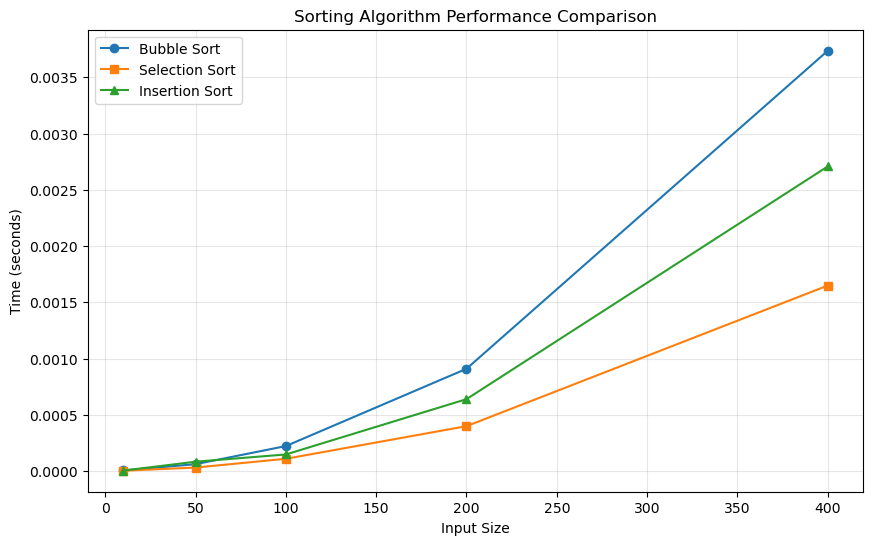

In [25]:
def compare_sorting_algorithms(sizes=[10, 50, 100, 200, 400]):
    """
    Compare the performance of bubble sort, selection sort, and insertion sort.

    Args:
        sizes: List of input sizes to test

    Returns:
        dict: Timing results for each algorithm
    """
    results = {
        'bubble': [],
        'selection': [],
        'insertion': []
    }

    # We implement a working bubble sort for comparison
    def bubble_sort(lst):
        n = len(lst)
        for i in range(n):
            swapped = False
            for j in range(0, n-i-1):
                if lst[j] > lst[j+1]:
                    lst[j], lst[j+1] = lst[j+1], lst[j]
                    swapped = True
            if not swapped:
                break

    for size in sizes:
        # Generate a random list for testing
        test_list = generate_random_list(size)

        # TODO: Time each sorting algorithm on the same list
        # Use the time_sort helper function defined earlier

        results['bubble'].append(time_sort(bubble_sort, test_list))
        results['selection'].append(time_sort(selection_sort, test_list))
        results['insertion'].append(time_sort(insertion_sort, test_list))
        # Hint: results['bubble'].append(time_sort(bubble_sort, test_list))
        pass

    return results, sizes

# Run the comparison
results, sizes = compare_sorting_algorithms()

# Visualize the results
if results['bubble']:  # Check if results were collected
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, results['bubble'], 'o-', label='Bubble Sort')
    plt.plot(sizes, results['selection'], 's-', label='Selection Sort')
    plt.plot(sizes, results['insertion'], '^-', label='Insertion Sort')
    plt.xlabel('Input Size')
    plt.ylabel('Time (seconds)')
    plt.title('Sorting Algorithm Performance Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

## Real World Application: Sorting Students by Grade

In [26]:
class Student:
    def __init__(self, name, student_id, grade):
        self.name = name
        self.student_id = student_id
        self.grade = grade

    def __repr__(self):
        return f"Student('{self.name}', ID:{self.student_id}, Grade:{self.grade})"

def sort_students(students, sort_by='grade', descending=False):
    """
    Sort a list of Student objects.

    Args:
        students: List of Student objects
        sort_by: Field to sort by ('grade', 'name', or 'student_id')
        descending: If True, sort in descending order

    Returns:
        Sorted list of students (creates a new list)
    """
    students_copy = students.copy()

    # TODO: Implement sorting based on the specified field
    # You can use any sorting algorithm you've implemented
    # Hint: You'll need to compare different attributes based on sort_by

    n = len(students_copy)

    #Check how the list should be ordered, descending or ascending

    if descending is False:
      i = 0
      while i < n:
        j = i
        #Check the sort_by and sort accordingly
        if sort_by == 'grade':
          while j > 0 and students_copy[j - 1].grade > students_copy[j].grade : #check if the left element is bigger
            students_copy[j - 1], students_copy[j] = students_copy[j], students_copy[j-1] #Swap bigger element to the right so in ascending order
            j -= 1 #move to left of list
          i += 1 #increment to check next element
        elif sort_by == 'name':
          while j > 0 and students_copy[j - 1].name > students_copy[j].name : #Check in first letter of name is of lesser value (e.g. A < B)
            students_copy[j - 1], students_copy[j] = students_copy[j], students_copy[j-1] #Swap bigger element to the right so in ascending order
            j -= 1 #move to left of list
          i += 1 #increment to check next element

    else:
      i = 0
      while i < n:
        j = i
        #Check the sort_by and sort accordingly
        if sort_by == 'grade':
          while j > 0 and students_copy[j - 1].grade < students_copy[j].grade : #check if the left element is bigger
            students_copy[j - 1], students_copy[j] = students_copy[j], students_copy[j-1] #Swap bigger element to the right so in descending order
            j -= 1 #move to left of list
          i += 1 #increment to check next element
        elif sort_by == 'name':
          while j > 0 and students_copy[j - 1].name < students_copy[j].name : #Check in first letter of name is of lesser value (e.g. A < B)
            students_copy[j - 1], students_copy[j] = students_copy[j], students_copy[j-1] #Swap bigger element to the right so in descending order
            j -= 1 #move to left of list
          i += 1 #increment to check next element


    return students_copy

In [27]:
# Test data
students = [
    Student("Alice", 1001, 85),
    Student("Bob", 1002, 92),
    Student("Charlie", 1003, 78),
    Student("Diana", 1004, 95),
    Student("Eve", 1005, 88),
    Student("Frank", 1006, 82)
]

# Test sorting by grade (ascending)
sorted_by_grade = sort_students(students, sort_by='grade', descending=False)
print("Sorted by grade (ascending):")
for student in sorted_by_grade:
    print(f"  {student}")

# Test sorting by name
sorted_by_name = sort_students(students, sort_by='name', descending=False)
print("\nSorted by name:")
for student in sorted_by_name:
    print(f"  {student}")

# Verify sorting
grades = [s.grade for s in sorted_by_grade]
assert grades == sorted(grades), "Grade sorting failed!"
print("\n✅ Student sorting works correctly!")

Sorted by grade (ascending):
  Student('Charlie', ID:1003, Grade:78)
  Student('Frank', ID:1006, Grade:82)
  Student('Alice', ID:1001, Grade:85)
  Student('Eve', ID:1005, Grade:88)
  Student('Bob', ID:1002, Grade:92)
  Student('Diana', ID:1004, Grade:95)

Sorted by name:
  Student('Alice', ID:1001, Grade:85)
  Student('Bob', ID:1002, Grade:92)
  Student('Charlie', ID:1003, Grade:78)
  Student('Diana', ID:1004, Grade:95)
  Student('Eve', ID:1005, Grade:88)
  Student('Frank', ID:1006, Grade:82)

✅ Student sorting works correctly!
